##### Importing Dataset

In [1]:
base_dataset = read.csv("Salary_Data.csv")
base_dataset

YearsExperience,Salary
1.1,39343
1.3,46205
1.5,37731
2.0,43525
2.2,39891
2.9,56642
3.0,60150
3.2,54445
3.2,64445
3.7,57189


##### Creating Test and Train Data

In [2]:
library(caTools)
set.seed(123)
split = sample.split(base_dataset$Salary, SplitRatio = 2/3)
#Dependent Variable is input here
split

Warning message:
"package 'caTools' was built under R version 3.4.3"

[1]  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE
[13]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE FALSE
[25]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE

In [3]:
training_dataset = subset(base_dataset,split== TRUE)
test_dataset = subset(base_dataset,split== FALSE)

##### Fitting on Training Dataset

In [4]:
regressor = lm(formula = Salary~YearsExperience,data = training_dataset)

###### To get summary of regressor

In [6]:
summary(regressor)
#Three stars means highly significant
#0 start means not significant
#Lower P value means high significance. Below 5%


Call:
lm(formula = Salary ~ YearsExperience, data = training_dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-7325.1 -3814.4   427.7  3559.7  8884.6 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25592       2646   9.672 1.49e-08 ***
YearsExperience     9365        421  22.245 1.52e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5391 on 18 degrees of freedom
Multiple R-squared:  0.9649,	Adjusted R-squared:  0.963 
F-statistic: 494.8 on 1 and 18 DF,  p-value: 1.524e-14


##### Predicting Results

In [8]:
y_pred = predict(regressor, newdata = test_dataset)
y_pred

2         4         5         8        11        16        20        21 
 37766.77  44322.33  46195.35  55560.43  62115.99  71481.07  81782.66  89274.72 
       24        26 
102385.84 109877.90

##### Visualization of Results

In [31]:
library(ggplot2)

In [34]:
training_dataset$Salary

[1]  39343  37731  56642  60150  64445  57189  55794  56957  57081  61111
[11]  66029  83088  81363  98273 101302 109431 116969 112635 122391 121872

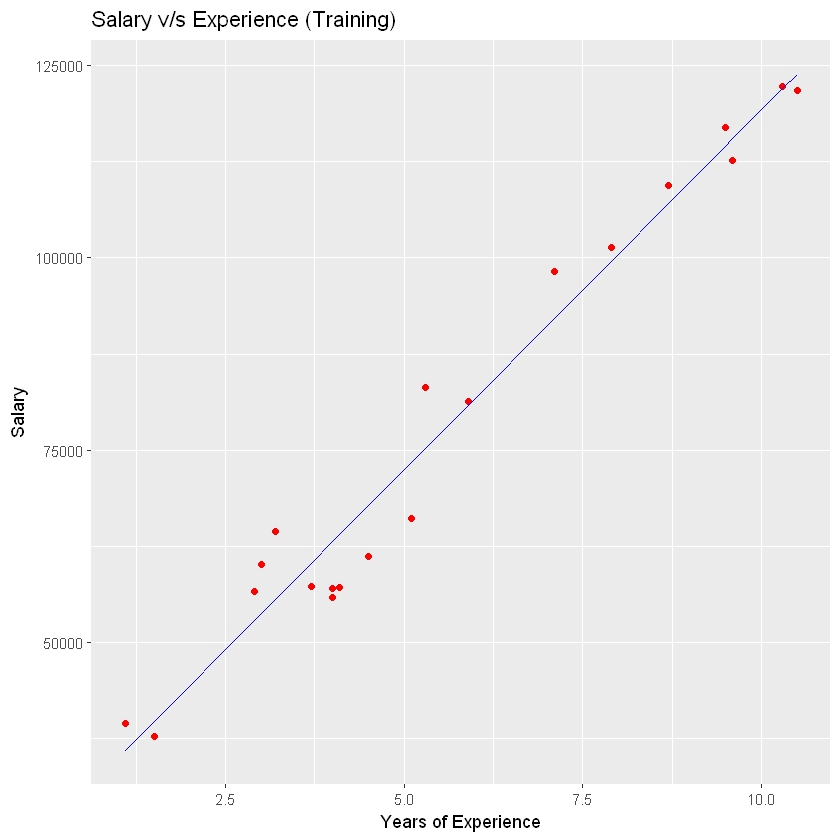

In [40]:
ggplot()+ 
#to plot scatter plot for observation points
geom_point(aes(x = training_dataset$YearsExperience, y = training_dataset$Salary),color = 'red') + 
#Plotting line for prediction
geom_line(aes(x = training_dataset$YearsExperience, y = predict(regressor,training_dataset)), color = 'blue') + 
ggtitle('Salary v/s Experience (Training)')+
xlab('Years of Experience')+
ylab('Salary')

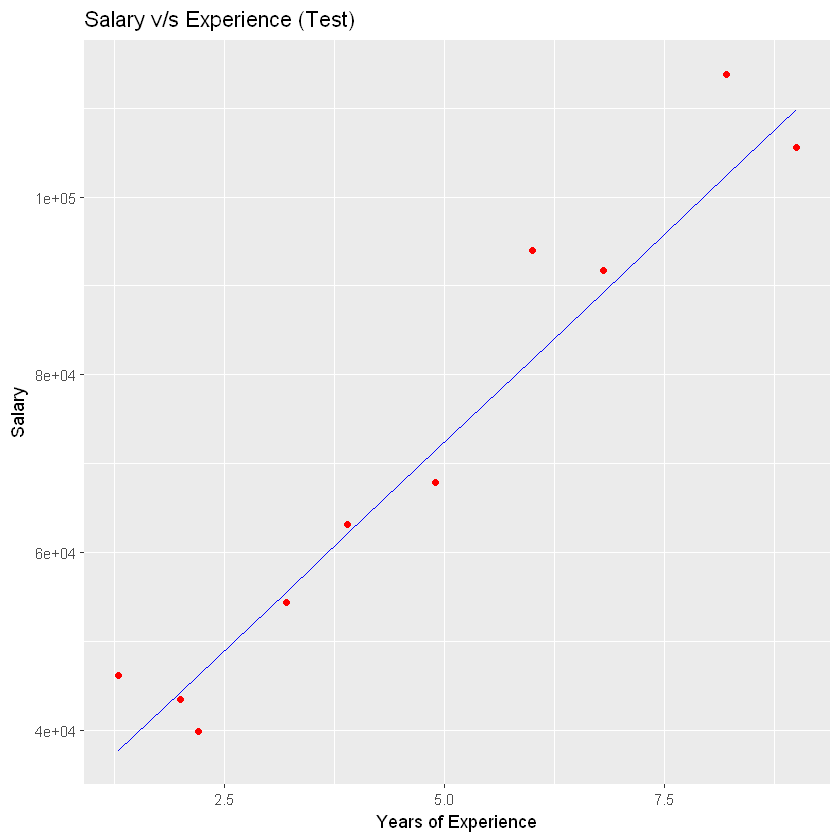

In [43]:
ggplot()+ 
#to plot scatter plot for test points
geom_point(aes(x = test_dataset$YearsExperience, y = test_dataset$Salary),color = 'red') + 
#Plotting line for predicted values
geom_line(aes(x = test_dataset$YearsExperience, y = y_pred), color = 'blue') + 
ggtitle('Salary v/s Experience (Test)')+
xlab('Years of Experience')+
ylab('Salary')